<a href="https://colab.research.google.com/github/cirilwakounig/MachineLearning/blob/main/1_Selecting_a_Random_Forest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Machine Learning on Kaggle

This script is based on the course 'Intermediate Machine Learning found on Kaggle'. The goal is to select the optimal model out of multiple different random forest models


In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

#### 1. Importing and Preparing your Data

---







In [ ]:
# Path of the file to read
train_path = '/content/drive/MyDrive/Colab Notebooks/Kaggle Course/Intermediate Machine Learning/train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/Kaggle Course/Intermediate Machine Learning/test.csv'

# Fill in the line below to read the file into a variable home_data
X_train_full = pd.read_csv(train_path, index_col = 'Id')
X_test_full = pd.read_csv(test_path, index_col= 'Id')

# Define the feature parameters for the model
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Develop the feature matrices based on the feature vector
X = X_train_full[features].copy()
X_test = X_test_full[features].copy()

y = X_train_full.SalePrice

In [ ]:
# Splitting the data into Train and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0)

#### 2. Model Development and Model Selection

---



In this section, multiple Random Forest models with different parameters will be generated. 

In [ ]:
# Generate Random Forest models using the Random Forest Regressor

model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]
model_names = ['m1','m2','m3','m4','m5']

In [ ]:
# Develop a function that scores the model performance based on MAE

def get_mae(model, X_train, y_train, X_val, y_val):

  # Define Model and fit to training data
  model.fit(X_train, y_train)

  # Make Predictions
  pred_train = model.predict(X_train)
  pred_val = model.predict(X_val)

  # Calculate errors
  mae_train = mean_absolute_error(y_train, pred_train)
  mae_val = mean_absolute_error(y_val, pred_val)

  return (mae_train, mae_val)

In [ ]:
# Iterate over the various models using the get_mae() function to score each models' performance

errors_train = []
errors_val = []

for i in models:
  mae_train, mae_val = get_mae(i, X_train, y_train, X_val, y_val) 
  errors_train.append(mae_train)
  errors_val.append(mae_val) 

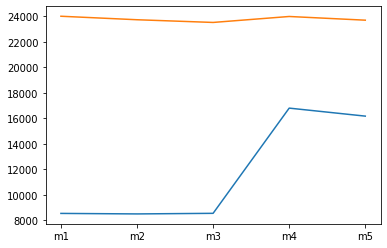

In [ ]:
plt.plot(model_names, errors_train)
plt.plot(model_names, errors_val)

In [ ]:
# Select the best model based on MAE-performance
opt_index = errors_val.index(min(errors_val))
optim_model = model_names[opt_index]
print('The best model is the model called:', optim_model)

The best model is the model called: m3
